In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
ds=pd.read_csv('covid2.csv')

In [7]:
ds.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [8]:
ds.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [9]:
for i in ds.columns:
    print("\033[1m"+i+"\033[0m",ds[i].unique())
    print('----------')

Province_State ['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']
----------
Country_Region ['US']
----------
Last_Update ['2020-05-21 02:32:54']
----------
Lat [ 32.3182  61.3707 -14.271   33.7298  34.9697  36.1162  39.0598  41.5978
  39.3185      nan  38.8974  27.7663  33.0406  13.4443  21.0943  44.2405
  40.3495  39.8494 

In [10]:
ds.drop(['Country_Region','Last_Update'],inplace=True,axis=1)
#dropping as completely categorical and has no influence on deaths

In [11]:
print(ds.isna().sum())
print(ds.isnull().sum())

Province_State           0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64
Province_State           0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64


In [14]:
ds.drop(['Lat','Long_'],axis=1,inplace=True)
#lat long values will not have effect on deaths

In [15]:
ds.drop(['ISO3'],axis=1,inplace=True)

In [19]:
#replace na values with appropriate fillers
ds['Recovered'].fillna(ds['Recovered'].mean(),inplace = True)
ds['People_Hospitalized'].fillna(ds['People_Hospitalized'].mean(),inplace = True)
ds['Hospitalization_Rate'].fillna(ds['Hospitalization_Rate'].mean(),inplace = True)

In [20]:
ds['Mortality_Rate'].fillna(ds['Mortality_Rate'].mean(),inplace = True)

In [21]:
print(ds.isna().sum())
print(ds.isnull().sum())

Province_State          0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           2
People_Tested           2
People_Hospitalized     0
Mortality_Rate          0
UID                     0
Testing_Rate            2
Hospitalization_Rate    0
dtype: int64
Province_State          0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           2
People_Tested           2
People_Hospitalized     0
Mortality_Rate          0
UID                     0
Testing_Rate            2
Hospitalization_Rate    0
dtype: int64


In [22]:
#replace ns with appropriate fillers
ds['Incident_Rate'].fillna(ds['Incident_Rate'].mean(),inplace = True)
ds['People_Tested'].fillna(ds['People_Tested'].mean(),inplace = True)
ds['Testing_Rate'].fillna(ds['Testing_Rate'].mean(),inplace = True)


In [23]:
print(ds.isna().sum())
print(ds.isnull().sum())

Province_State          0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64
Province_State          0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64


In [24]:
ds.drop('Province_State',axis=1,inplace=True)

In [27]:
#Defining numerical_col and target
num_col = ['Confirmed','Recovered','Active','FIPS','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Testing_Rate','Hospitalization_Rate']
target  = ['Deaths']

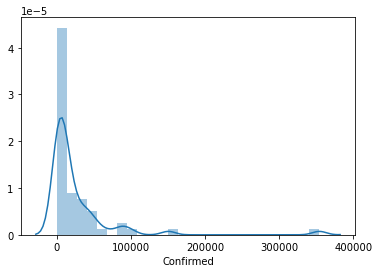

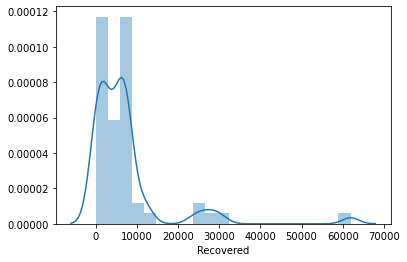

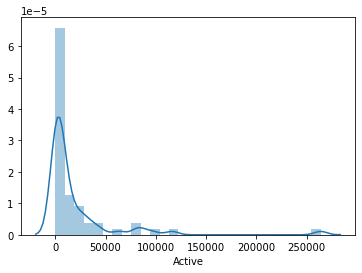

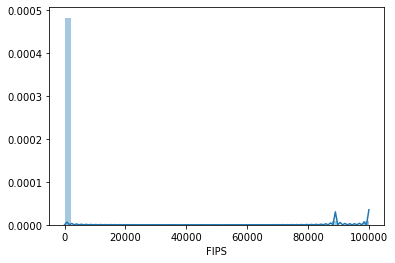

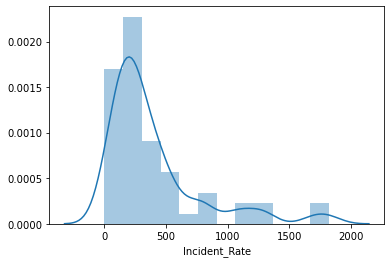

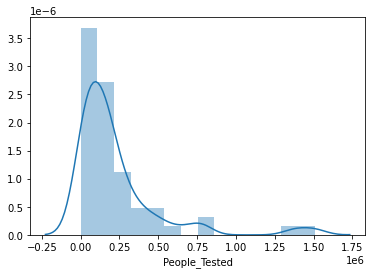

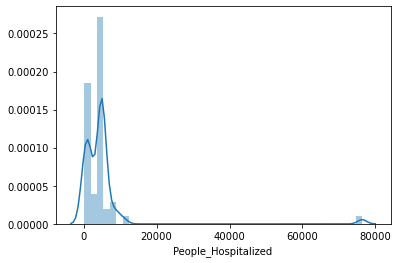

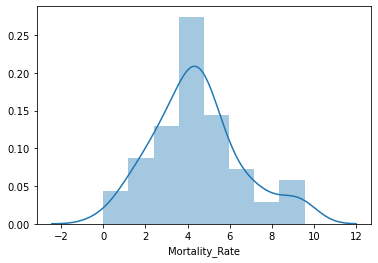

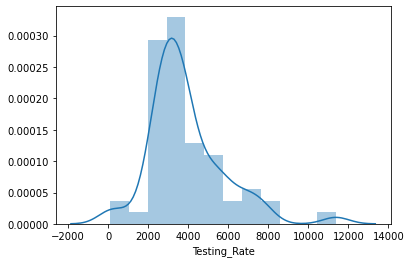

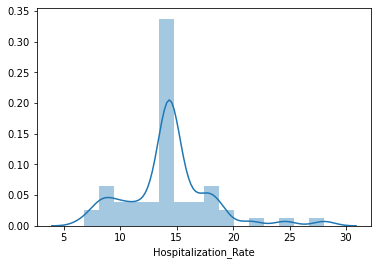

In [28]:
#check distribution of data
for i in num_col:
    sns.distplot(ds[i])
    plt.show()

In [29]:
ds.head()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
0,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,3353.942386,11.438860
1,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,5063.940017,14.342541
2,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,16,222.857246,14.342541
3,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,2272.859351,12.022005
4,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,3189.670370,10.693584


In [30]:
ds_fin=ds[['Confirmed','Recovered','Active','FIPS','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','Testing_Rate','Hospitalization_Rate','Deaths']]

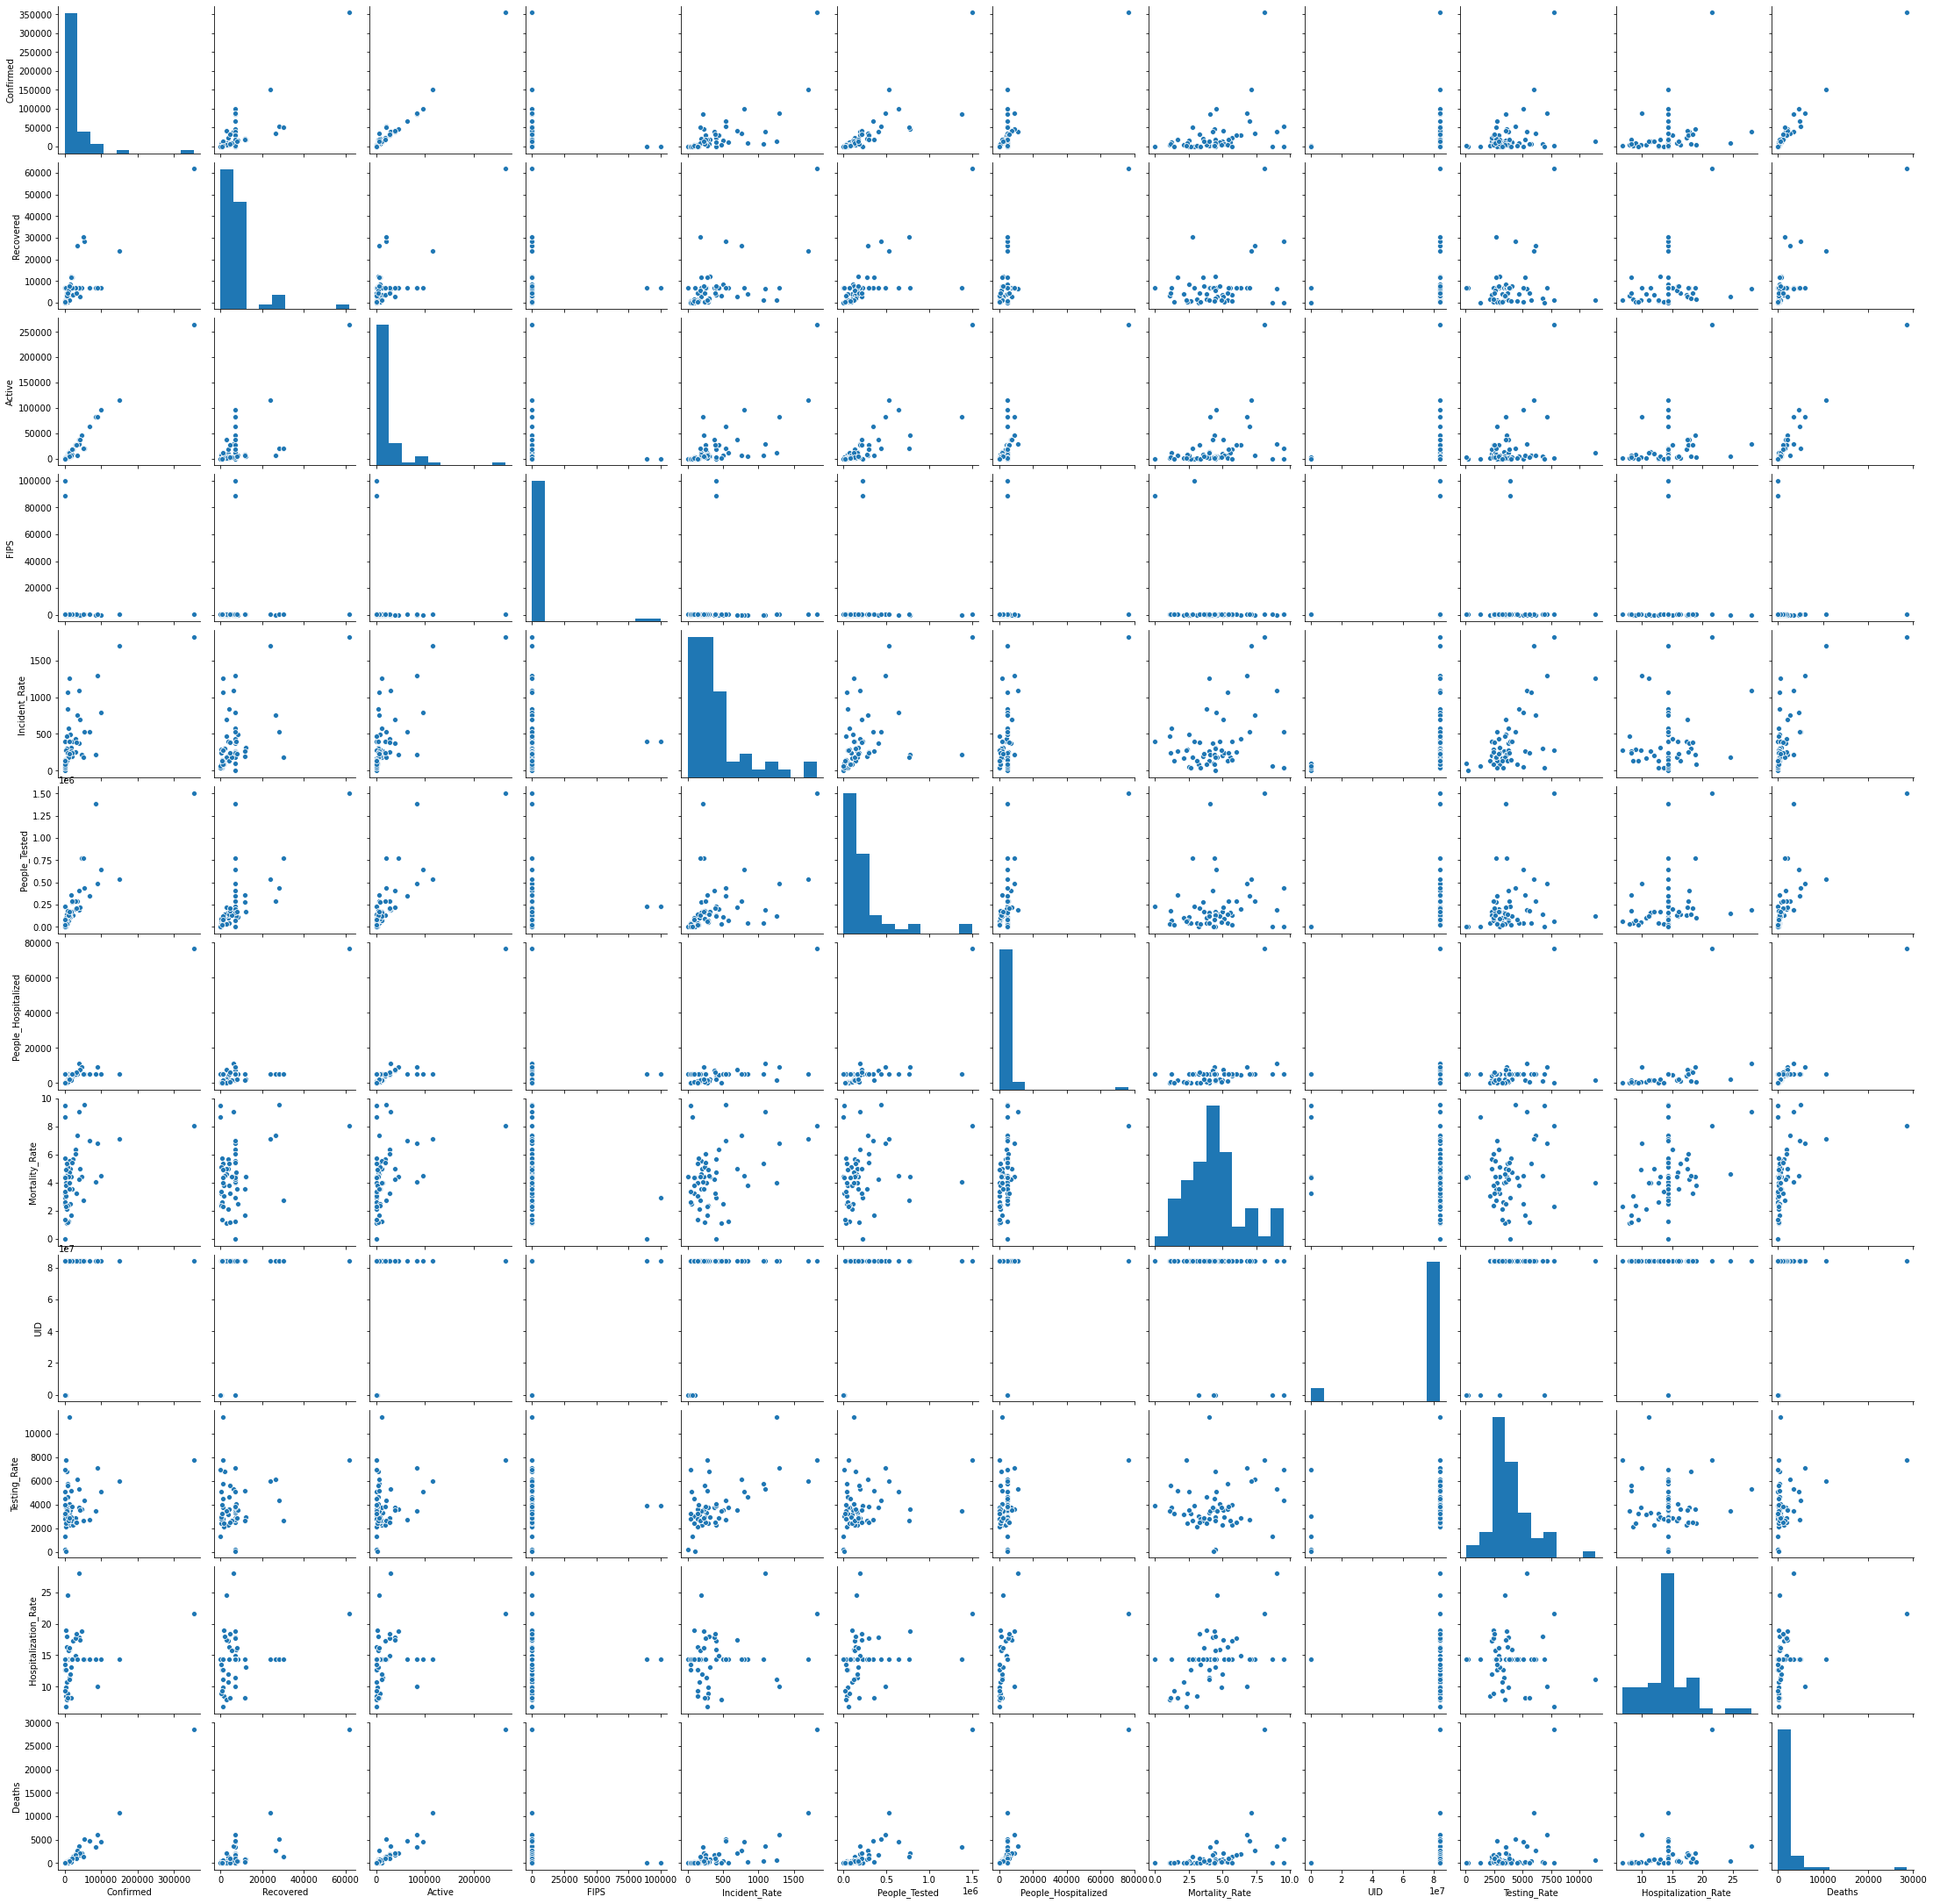

In [31]:
#check relation of data with each other
sns.pairplot(ds_fin)

In [32]:
#check correlation
corr_ds=ds_fin.corr()

In [34]:
#correlation with target
corr_ds['Deaths']

Confirmed               0.982191
Recovered               0.830223
Active                  0.954378
FIPS                   -0.075053
Incident_Rate           0.710105
People_Tested           0.739634
People_Hospitalized     0.908279
Mortality_Rate          0.427127
UID                     0.120043
Testing_Rate            0.344465
Hospitalization_Rate    0.298225
Deaths                  1.000000
Name: Deaths, dtype: float64

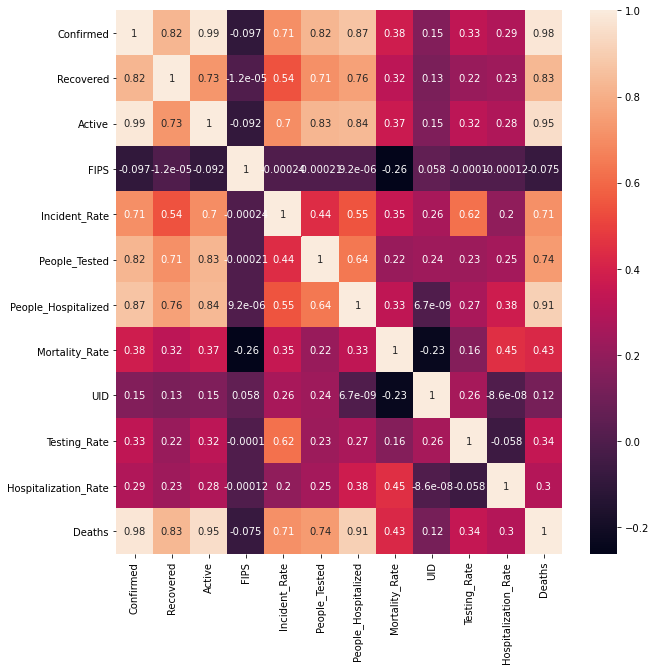

In [35]:
#plot correlation
plt.figure(figsize=(10,10))
sns.heatmap(ds_fin.corr(),color='k',annot=True)

In [36]:
ds_fin.head()

,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate,Deaths
0,13052,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,3353.942386,11.438860,522
1,401,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,5063.940017,14.342541,10
2,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,16,222.857246,14.342541,0
3,14906,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,2272.859351,12.022005,747
4,5003,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,3189.670370,10.693584,107


In [37]:
ds_fin.describe()

,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate,Deaths
count,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000
mean,26756.086207,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541,1611.017241
std,52562.031122,9901.304545,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,2.116191,2.378302e+07,1898.951207,3.781861,4084.750891
min,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043,0.000000
25%,2596.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,8.400001e+07,2741.843521,12.829963,74.000000
50%,10148.500000,4987.000000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,4.409323,8.400003e+07,3501.526835,14.342541,385.000000
75%,29395.500000,7007.428571,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,5.450908,8.400004e+07,4622.586404,15.552021,1394.250000
max,354370.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438,28636.000000


1. we can see many columns have outliers but there is almost no data hence not taking risk of dropping rows
2. fips is having outliers but is also having very less correlation with target hence does not affect the prediction much

In [41]:
#divide train and test dataset
df_x=ds_fin.iloc[:,:-1]
df_y=ds_fin['Deaths']

In [43]:
#transform data as this is a regression problem
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x=pt.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [44]:
x.head()

,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
0,0.181939,0.460677,0.454914,-3.392353,-0.073553,0.168217,-0.468919,-0.143499,0.307007,-0.200448,-0.755623
1,-1.263873,-1.411467,-1.472762,-2.699043,-1.355052,-0.823562,0.484695,-0.926451,0.307008,0.685050,0.084663
2,-2.355868,0.460677,-2.075004,0.649887,-3.028615,-2.501850,0.484695,0.076228,-3.255814,-2.666306,0.084663
3,0.257182,-0.029178,0.362554,-1.926052,-0.324350,0.172973,-0.335798,0.331894,0.307008,-0.851754,-0.576624
4,-0.310801,-0.013795,-0.581525,-1.674746,-0.514399,-0.230937,-1.138174,-1.128940,0.307008,-0.293648,-0.993146


In [45]:
y=df_y

In [46]:
#import required
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [47]:
#divide in train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)
print(x_train.shape)
print(y_train.shape)

(46, 11)
(46,)


In [48]:
#first prediction
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
r2_score(y_test,pred_lr)

0.5947952623634658

In [ ]:
df_x=ds_fin.iloc[:,:-1]
df_y=ds_fin['Deaths']

In [51]:
#dividing data again
x1=pt.fit_transform(df_x)
x1=pd.DataFrame(x1,columns=df_x.columns)

In [52]:
y1=ds_fin['Deaths']

In [53]:
#check for best random state for best r2score
r2_scr = 0
random_state=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=i)
    lr.fit(x1_train,y1_train)
    pred_lr = lr.predict(x1_test)
    x=r2_score(y1_test,pred_lr)
    if x>r2_scr:
        r2_scr = x
        random_state=i

In [54]:
print(r2_scr,random_state)

0.6930653955462722 65


In [56]:
#random forest regressor to check if we get better results
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
r2_scr_rfr = 0
random_state_rfr=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=i)
    rfr.fit(x1_train,y1_train)
    pred_rfr = rfr.predict(x1_test)
    x=r2_score(y1_test,pred_rfr)
    if x>r2_scr_rfr:
        r2_scr_rfr = x
        random_state_rfr=i
print(r2_scr_rfr,random_state_rfr)
print(r2_score(y1_test,pred_rfr))

0.9769507329098491 71
0.779240909759139


In [61]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=7)
r2_scr_knn = 0
random_state_knn=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=i)
    knn.fit(x1_train,y1_train)
    pred_knn = knn.predict(x1_test)
    x=r2_score(y1_test,pred_knn)
    if x>r2_scr_knn:
        r2_scr_knn = x
        random_state_rfr=i
print(r2_scr_rfr,random_state_knn)
print(r2_score(y1_test,pred_knn))

0.9769507329098491 0
0.8827871117134917


In [64]:
df_x=ds_fin.iloc[:,:-1]
df_y=ds_fin['Deaths']
x1=pt.fit_transform(df_x)
x1=pd.DataFrame(x1,columns=df_x.columns)
y1=ds_fin['Deaths']

In [66]:
#finlaizing rfr as knn and rfr have same r2score
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=71)
rfr.fit(x1_train,y1_train)
y_pred = rfr.predict(x1_test)
print(r2_score(y1_test,y_pred))

0.9753981584294406


In [68]:
import joblib
joblib.dump(rfr,'covid.pkl')

['covid.pkl']

In [ ]:
#finalize rfr regression, to improve accuracy we need more data